In [2]:
!pip install dotenv

In [6]:
import pandas as pd

from dotenv import load_dotenv

load_dotenv()

s3_uri = os.getenv("S3_URI")

df = pd.read_csv(s3_uri, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [2]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [3]:
df_work = df[['TITLE', 'CATEGORY']]

In [4]:
df_work['CATEGORY'].value_counts()

CATEGORY
e    152469
b    115967
t    108344
m     45639
Name: count, dtype: int64

In [5]:
my_dict = {
    'b':'Business',
    'e':'Entertainment',
    't':'Technology',
    'm':'Medicine'
}

In [6]:
df_work['CATEGORY'] = df_work['CATEGORY'].apply(lambda x: my_dict[x])

/tmp/ipykernel_16614/707029325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work['CATEGORY'] = df_work['CATEGORY'].apply(lambda x: my_dict[x])


In [7]:
df_work

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",Business
1,Fed's Charles Plosser sees high bar for change...,Business
2,US open: Stocks fall after Fed official hints ...,Business
3,"Fed risks falling 'behind the curve', Charles ...",Business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Business
...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,Medicine
422415,Boy to have surgery on esophagus after battery...,Medicine
422416,Child who swallowed battery to have reconstruc...,Medicine
422417,Phoenix boy undergoes surgery to repair throat...,Medicine


In [8]:
df_work.CATEGORY.value_counts()

CATEGORY
Entertainment    152469
Business         115967
Technology       108344
Medicine          45639
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


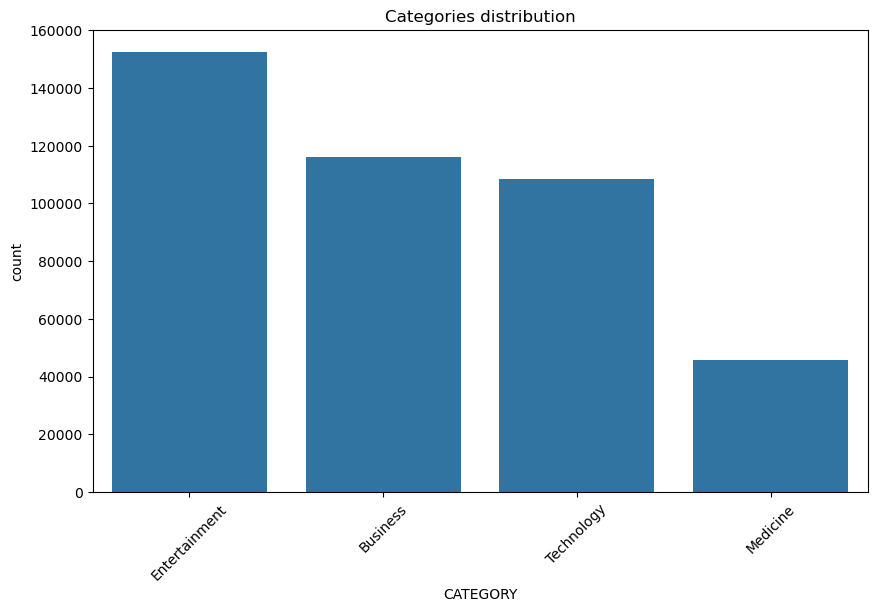

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,6))
sn.countplot(data=df_work, x='CATEGORY', order=df_work['CATEGORY'].value_counts().index)
plt.title('Categories distribution')
plt.xticks(rotation=45)
plt.show()

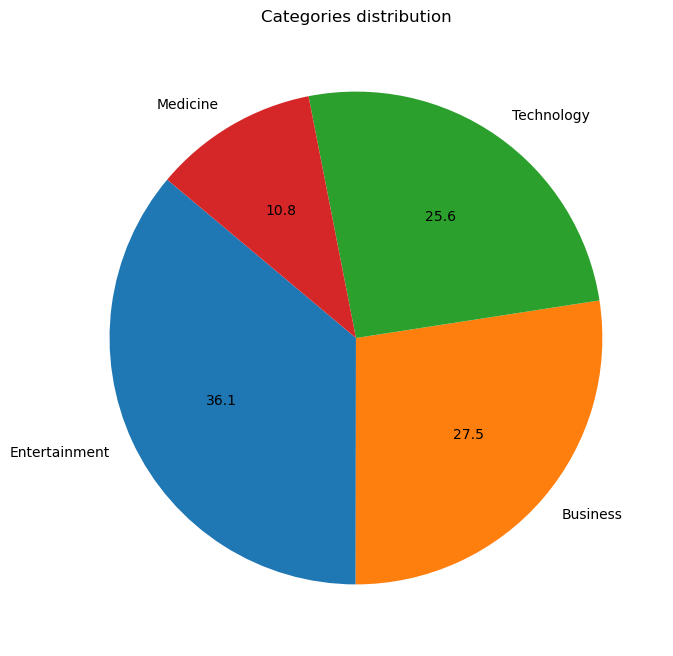

In [10]:
category_counts = df_work['CATEGORY'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f', startangle=140)
plt.title('Categories distribution')
plt.show()

In [8]:
categories = list(df_work['CATEGORY'].unique())
df['CATEGORY'] = df_work['CATEGORY'].apply(lambda x: categories.index(x) if x in categories else len(categories))

In [10]:
df.CATEGORY.unique()

array([0, 1, 2, 3])